## Announcing: Lagoon

We are happy to announce the open source release of [Lagoon](https://github.com/tweag/lagoon). Codeveloped with Pfizer, Lagoon is a tool for centralizing semi-structured datasets like CSV or JSON files into a data “lagoon”, where your data can be easily versioned, queried, or passed along to other ETL pipelines.

### Overview

Lagoon was created to make large sets of delimited text and JSON files with hetereogeneous schemas easier to query and integrate into data analysis and data science workflows. The primary component of Lagoon is its server which is layered on top of a Postgres database. Making use of Haskell’s type system, the Lagoon server automatically generates schemas for your datasets, allowing you to directly ingest them without having to manually configure database tables. Data is queryable via a REST API, client libraries, or directly in Postgres via automatically generated SQL views.

### Key Features

- Support for ingestion of JSON and delimited text files
- Data versioning - store and query multiple versions of the same dataset
- SQL queries via a REST API or directly in Postgresql via automatically generated SQL views
- Command line, Python, Ruby, and R clients
- Easy integration with other applications and ETL tools via the REST and SQL interfaces
- Can serve as a hub for data analysis projects or a starting point for other ETL pipelines

### Why use Lagoon?

While other tools like [Apache Drill](https://drill.apache.org/) also provide cross-dataset querying capabilities, they typically require the user to manually specify types for data stored in text-based formats. Lagoon’s type inference makes the process of querying these datasets smoother, and since data is ingested into a centralized relational database, it’s easier to integrate that data with traditional ETL tools.

### Example

Let's try it out! As a simple example, we can ingest and query a few datasets from the [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents) which contains a record of major storm events in the United States over the past century. In this example, we will:
  1. Start up a lagoon server and database backend using [docker](https://docs.docker.com/get-docker/) and [docker-compose](https://docs.docker.com/compose/)
  2. Ingest a few example files into our new lagoon using the [lagoon-client](https://hub.docker.com/r/tweag/lagoon-client) docker image
  3. Query and plot some data from our newly ingested storm datasets using Lagoon's [python client library](https://github.com/tweag/lagoon/tree/master/clients/PyLagoon)

#### 1. Create a new lagoon
We can create a new lagoon instance using the docker-compose file that is included in the GitHub repository:

In [3]:
%%bash
# Note: we are assuming that this example is being run from the lagoon/docs directory
cd ../docker
docker-compose up -d

Creating network "docker_default" with the default driver
Creating docker_postgres_1 ... 
Creating docker_postgres_1
Creating docker_lagoon-server_1 ... 
Creating docker_lagoon-server_1
ting docker_lagoon-server_1 ... done

#### 2. Ingest our example datasets

Now that the lagoon server is running, we can ingest some example datasets. One easy way to ingest data is via the [lagoon-client]() docker image. 

Let's take a look at the storms from 2019.  The data files in this example can be downloaded
from the NOAA storms file server at https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/

In [5]:
%%bash
# Note: these commands assume you've downloaded the csv files to your working directory
docker run --rm --network="host" --volume "$PWD/StormEvents_details-ftp_v1.0_d2019_c20200716.csv:/StormEvents_details-ftp_v1.0_d2019_c20200716.csv" \
    tweag/lagoon-client --port 1234 --host localhost ingest --comma -n storm_details_2019 /StormEvents_details-ftp_v1.0_d2019_c20200716.csv

docker run --rm --network="host" --volume "$PWD/StormEvents_fatalities-ftp_v1.0_d2019_c20200716.csv:/StormEvents_fatalities-ftp_v1.0_d2019_c20200716.csv" \
    tweag/lagoon-client --port 1234 --host localhost ingest --comma -n storm_fatalities_2019 /StormEvents_fatalities-ftp_v1.0_d2019_c20200716.csv

storm_details_2019 (version 1)
  URL         (local)
  description storm_details_2019
  tags        (no tags)
  created     2020-08-21 08:48:03.583204579 UTC
  added by    unauthenticated-user
  deprecated  False
  schema      demo
  table       t1 (with view storm_details_2019_v1)
  typed       typed1 (with view storm_details_2019_v1_typed)
  row count   67506
  columns
    	Type	Name
    c1	INTEGER	BEGIN_YEARMONTH (BEGIN_YEARMONTH)
    c2	INTEGER	BEGIN_DAY (BEGIN_DAY)
    c3	INTEGER	BEGIN_TIME (BEGIN_TIME)
    c4	INTEGER	END_YEARMONTH (END_YEARMONTH)
    c5	INTEGER	END_DAY (END_DAY)
    c6	INTEGER	END_TIME (END_TIME)
    c7	INTEGER	EPISODE_ID (EPISODE_ID)
    c8	INTEGER	EVENT_ID (EVENT_ID)
    c9	TEXT	STATE (STATE)
    c10	INTEGER	STATE_FIPS (STATE_FIPS)
    c11	INTEGER	YEAR (YEAR)
    c12	TEXT	MONTH_NAME (MONTH_NAME)
    c13	TEXT	EVENT_TYPE (EVENT_TYPE)
    c14	TEXT	CZ_TYPE (CZ_TYPE)
    c15	INTEGER	CZ_FIPS (CZ_FIPS)
    c16	TEXT	CZ_NAME (CZ_NAME)
    c17	TEXT	WFO (WFO)
    c18	TEXT

Starting ingest proper
  Processed 67506 records
Creating indices for demo.t1
  Creating primary key .. ok
  Creating index on column c1 .. ok
  Creating index on column c2 .. ok
  Creating index on column c3 .. ok
  Creating index on column c4 .. ok
  Creating index on column c5 .. ok
  Creating index on column c6 .. ok
  Creating index on column c7 .. ok
  Creating index on column c8 .. ok
  Creating index on column c9 .. ok
  Creating index on column c10 .. ok
  Creating index on column c11 .. ok
  Creating index on column c12 .. ok
  Creating index on column c13 .. ok
  Creating index on column c14 .. ok
  Creating index on column c15 .. ok
  Creating index on column c16 .. ok
  Creating index on column c17 .. ok
  Creating index on column c18 .. ok
  Creating index on column c19 .. ok
  Creating index on column c20 .. ok
  Creating index on column c21 .. ok
  Creating index on column c22 .. ok
  Creating index on column c23 .. ok
  Creating index on column c24 .. ok
  Creating ind

#### 3. Querying data

With our data ingested we can start querying data using PyLagoon and analyze it using some standard data science tools in Python.

In [6]:
from PyLagoon import LagoonConfig, Lagoon, PGMeta

The first thing we need to do is initialize our client using the example config provided with the lagoon repository.

In [7]:
lagoon = Lagoon(
    config=LagoonConfig.load(yaml_file="../docker/examples/lagoon-client.yaml")
)

Using ../docker/examples/lagoon-client.yaml for configuration


/home/dorran/Documents/tweag/lagoon/clients/PyLagoon/PyLagoon/config.py:52: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_opts = yaml.load(open(yaml_file))


Now, we can access our datasets using the names we provided when we ingested them. You can also query for all data sources by ommitting the `name` kwarg or query by tag using the `tag` kwarg.

In [8]:
details_source = lagoon.sources(name="storm_details_2019")[0]
fatalities_source = lagoon.sources(name="storm_fatalities_2019")[0]

Each source contains a description of its corresponding dataset, but no actual data has been loaded yet. To load data into a pandas DataFrame, we can use our `lagoon` object's `download_query()` or `download_source()` methods.

Let's query all of the storms that happened in Texas in 2019.  One the advantages to using Lagoon is that we can limit the data we load into memory to records we're interested in by specifying a SQL query.  This allows us to limit client resource consumption.

In [9]:
# Lagoon uses SQLAlchemy for formatting SQL queries: https://www.sqlalchemy.org/

# To construct queries using SQLAlchemy, we need to generate a description of our database schema
meta = PGMeta([details_source, fatalities_source])

# Schemas for our two datasets:
storms = meta[details_source]
fatalities = meta[fatalities_source]

# Note: we can use the PyLagoon.build_sql_query() function to preview or spot-check our query
query = meta.query(storms).filter(storms.STATE.like("%TEXAS%"))

df = lagoon.download_query(query=query, sources=[details_source])

/home/dorran/Documents/tweag/lagoon/clients/PyLagoon/venv/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


With our query results loaded, we can start working with our dataset. For example, we can map the storms along with their types.

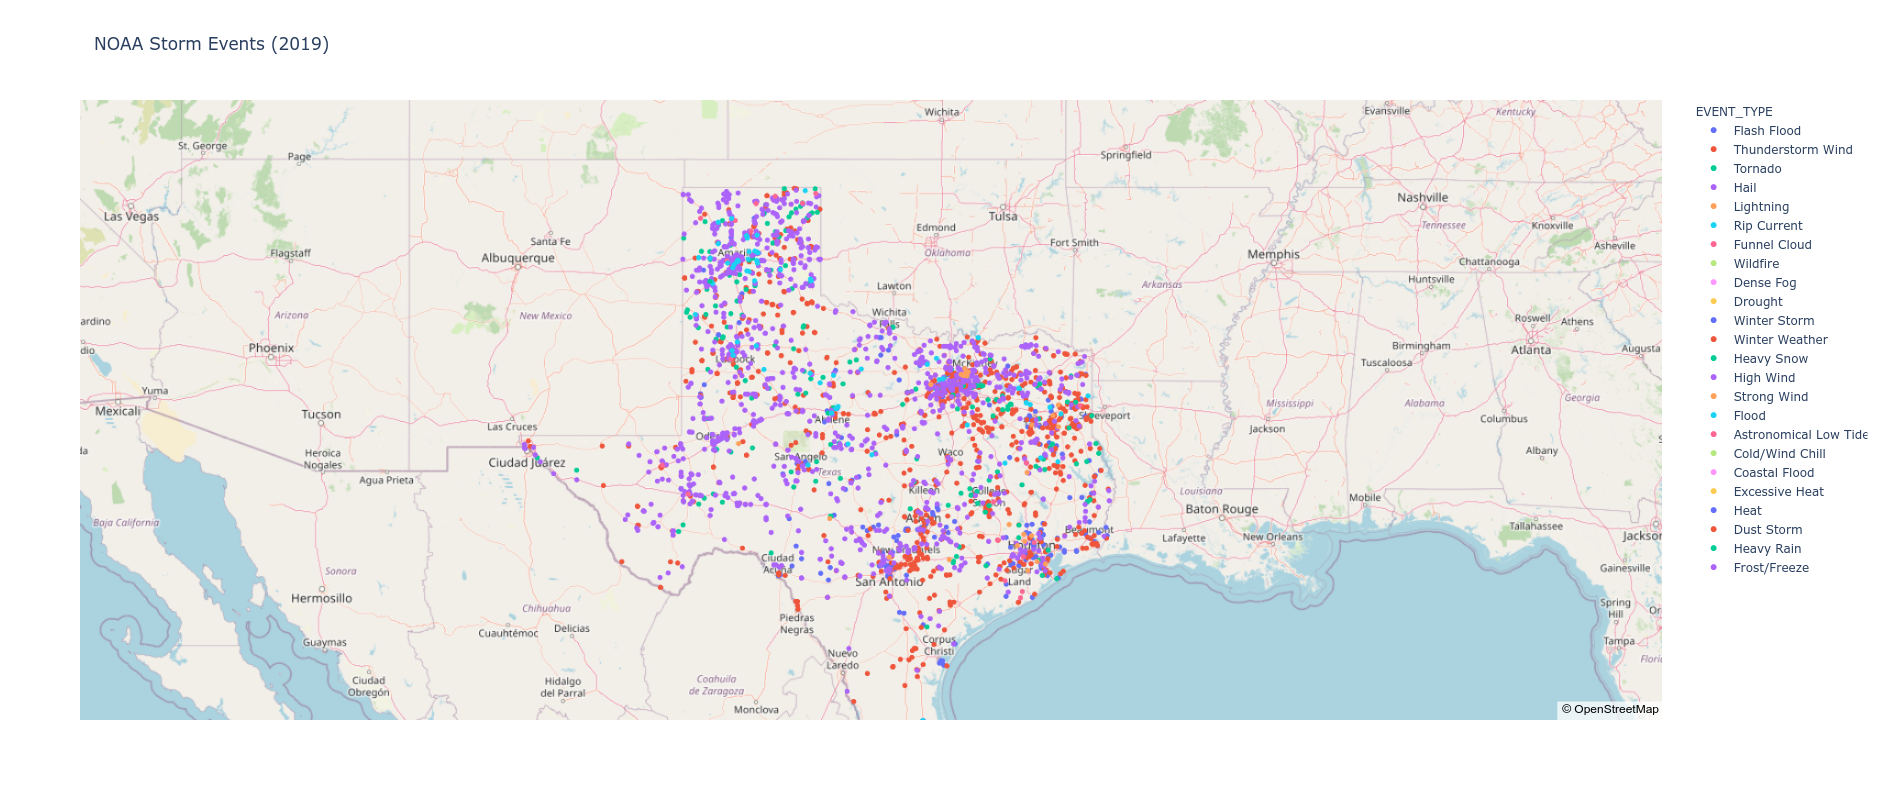

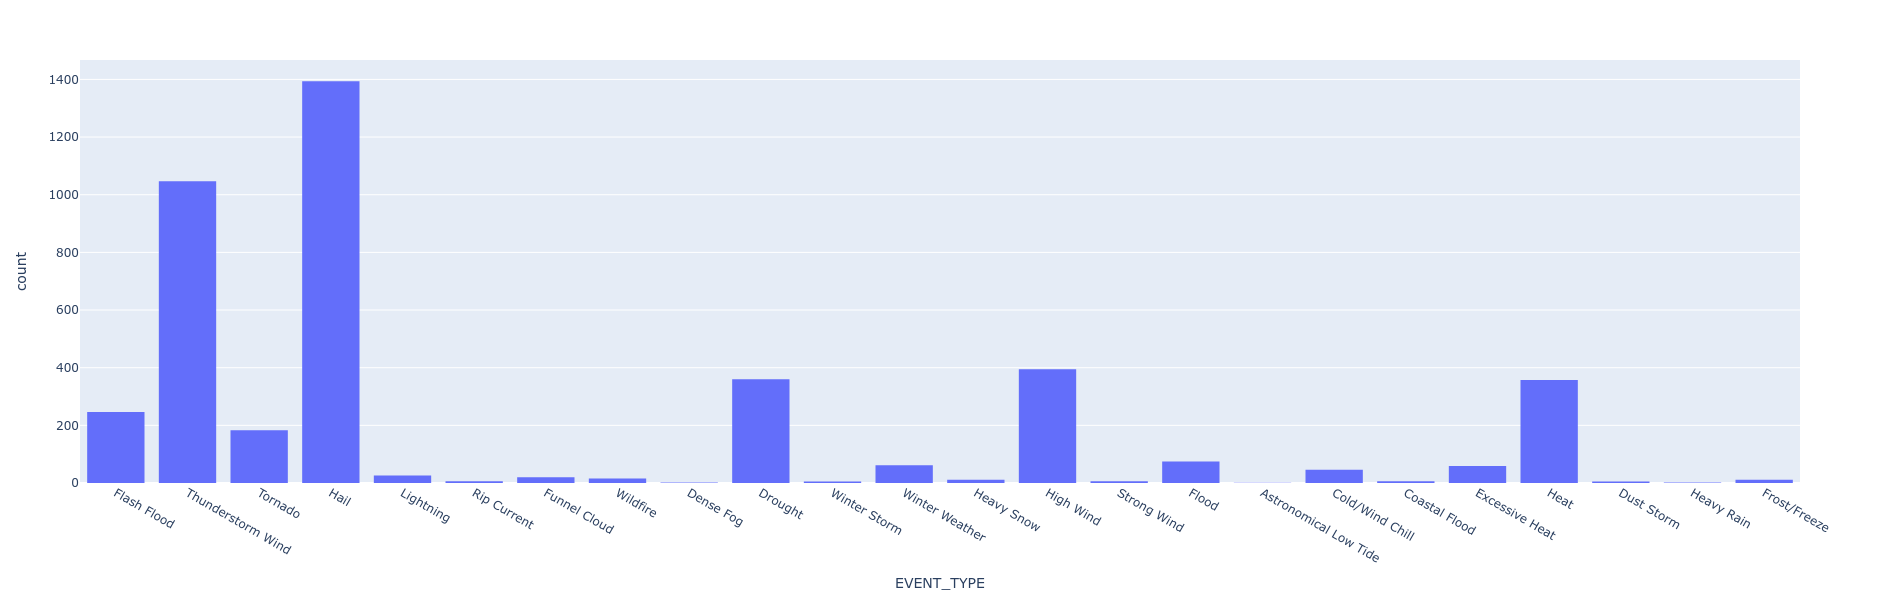

In [21]:
# https://pandas.pydata.org/
# https://plotly.com/python/

import pandas as pd
import plotly.express as px

# It looks like some bad values in the lat/lon columns forced them 
# to be stored as strings. We can still cast them to floats (ignoring 
# errors) using pandas:
df["BEGIN_LAT"] = pd.to_numeric(df["BEGIN_LAT"])
df["BEGIN_LON"] = pd.to_numeric(df["BEGIN_LON"])

px.scatter_mapbox(
    df, 
    lat="BEGIN_LAT", 
    lon="BEGIN_LON",
    color="EVENT_TYPE",
    mapbox_style="open-street-map",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=5,
    title="NOAA Storm Events (2019)",
    width=1000,
    height=800
).show()

px.histogram(df, x="EVENT_TYPE", width=1000, height=600).show()


It looks like Texas has a lot of hail storms!

We can also perform more complex queries. For example, we can join our two datasets to see the type of location where the most storm-related fatalities occurred in 2019.

/home/dorran/Documents/tweag/lagoon/clients/PyLagoon/venv/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



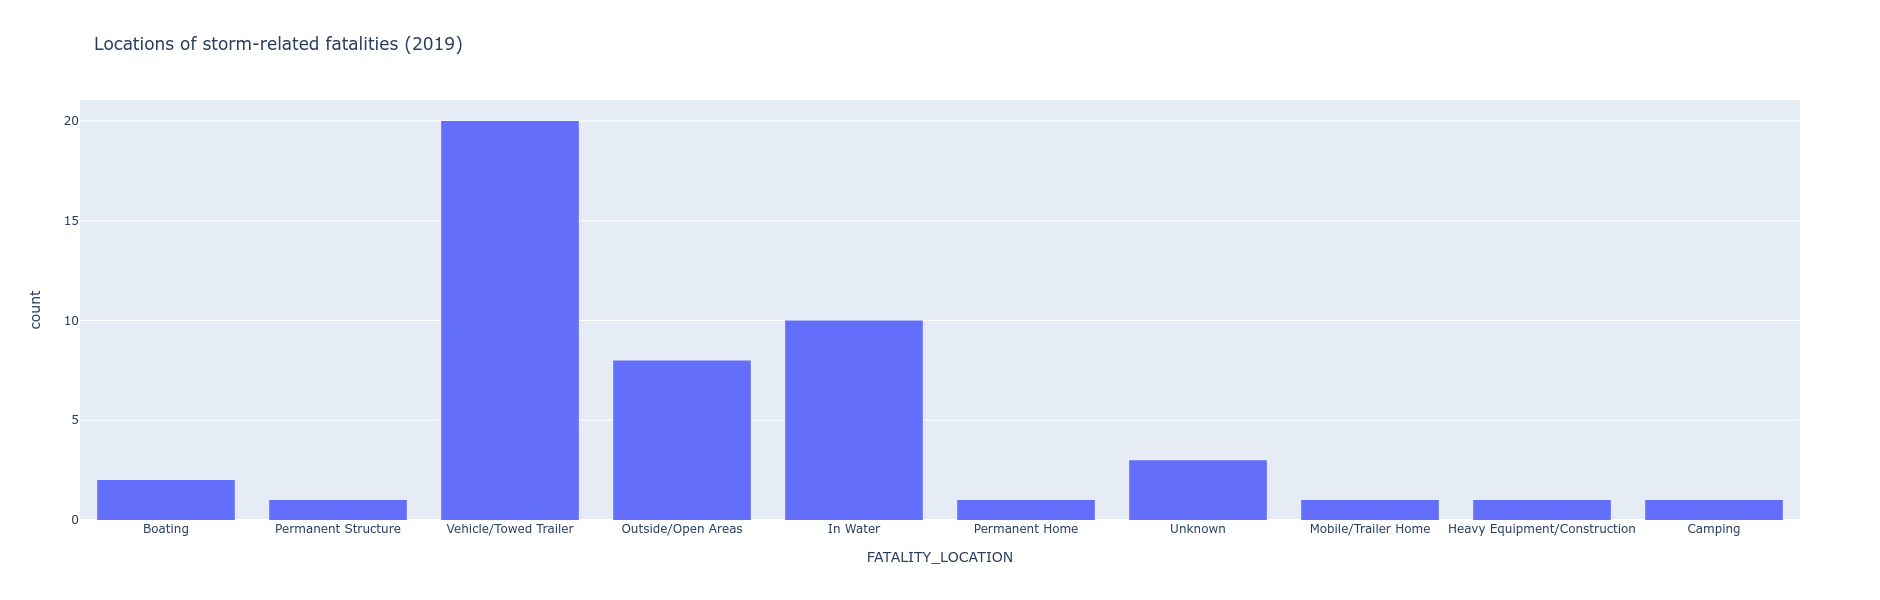

In [18]:
query = (
    meta.query(
        storms.EVENT_ID, storms.BEGIN_LAT, storms.BEGIN_LON, fatalities.FATALITY_LOCATION
    )
    .join(fatalities, storms.EVENT_ID == fatalities.EVENT_ID)
    .filter(storms.STATE.like("%TEXAS%"))
)
df_joined = lagoon.download_query(query=query, sources=[details_source, fatalities_source])

fig = px.histogram(
    df_joined, 
    x="FATALITY_LOCATION",
    title="Locations of storm-related fatalities (2019)",
    width=1000, 
    height=600
)
fig.show()


With just a few quick commands we were able to ingest new datasets into our lagoon and start querying them, all without having to worry about generating database schemas.

#### Next steps

The Lagoon server and command line client are available as Docker images [on DockerHub](https://hub.docker.com/u/tweag), and all components are also packaged using Nix in the [Lagoon GitHub repository](https://github.com/tweag/lagoon).

To get started with lagoon, check out the lagoon [documentation](https://github.com/tweag/lagoon) on GitHub. Thanks for reading, and we hope that Lagoon is able to help streamline your data analysis workflows.